72.62403183519902
0.7220683302705961
[5.29627787e-02 3.54581619e-03 1.25581593e-02 8.09536495e-02
 2.09443965e-01 3.98472061e-01 6.48186946e-01 9.58420719e-01
 1.32866882e+00 1.75807449e+00 2.24541840e+00 2.78911429e+00
 3.38721135e+00 4.03740381e+00 4.73704800e+00 5.48318673e+00
 6.27258069e+00 7.10174603e+00 7.96699712e+00 8.86449326e+00
 9.79028785e+00 1.07403785e+01 1.17107563e+01 1.26974535e+01
 1.36965873e+01 1.47043991e+01 1.57172894e+01 1.67318454e+01
 1.77448639e+01 1.87533672e+01 1.97546139e+01 2.07461034e+01
 2.17255764e+01 2.26910106e+01 2.36406128e+01 2.45728088e+01
 2.54862300e+01 2.63796992e+01 2.72522154e+01 2.81029372e+01
 2.89311667e+01 2.97363338e+01 3.05179801e+01 3.12757440e+01
 3.20093464e+01 3.27185776e+01 3.34032843e+01 3.40633584e+01
 3.46987263e+01 3.53093392e+01 3.58951643e+01 3.64561768e+01
 3.69923528e+01 3.75036628e+01 3.79900661e+01 3.84515055e+01
 3.88879031e+01 3.92991561e+01 3.96851338e+01 4.00456748e+01
 4.03805844e+01 4.06896333e+01 4.09725563e+01 4.

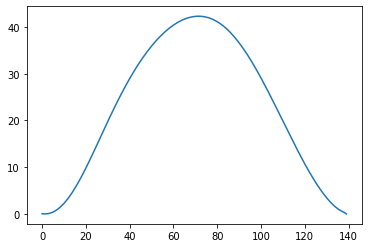

In [3]:
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt
from   statsmodels.nonparametric.kernel_regression import KernelReg
from   scipy.fft import fft, fftfreq
from   scipy     import pi
import scipy.signal
import openpyxl
from   scipy.fftpack import fft
#===========================================================================
from   tkinter     import *
from   tkinter.ttk import *
from   pylab       import *
import math
from   statistics  import mean
from   six.moves   import tkinter as tk
import time 

PI = 3.1416
TYPE=1
n=140 #numero de puntos
#Medidas de geometría del balancín
A=55
C=48
I=48
P=57
H=96
G=41.5
R=18
CW=-1 #horario positivo antihorario negativo
#===========CALCULOS DE ANGULOS TEORICOS===========================#
K =(I**2 + (H-G)**2)**0.5
print(K)
#Calculo del angulo que da la mínima posición
if TYPE == 1: #Convencional
    PHIt = math.asin(I/K)
    THETAktopt = math.acos((K**2+(R+P)**2-C**2)/(2*K*(R+P)))
    if THETAktopt > PHIt:
        THETAtopt = PHIt + THETAktopt
    else:
        THETAtopt = PHIt - THETAktopt
elif TYPE == 2: #MARK II
    PHIt = math.atan(I/(H-G)) + PI
    THETAktopt=math.acos((K**2+(P+R)**2-C**2)/(2*K*(P-R)))
    THETAtopt=THETAktopt-(PHIt-PI)
else:  #Airbalance
    PHIt=PI - math.atan(I/(H-G))
    THETAktopt=math.acos((K**2+(P-R)**2-C**2)/(2*K*(P-R))) 

print(PHIt)
#crear el vector de tamaño n desde 0+THETAtopt hasta 2*PI+THETAtopt

THETAtt=np.arange(0, 2*PI, 2*PI/(n))
THETAtt1=abs(2*PI-THETAtt)


#====================================Calculos de ángulos=====================================================#
#inicio los vectores 
BETAt  = np.zeros(n)
PSIt   = np.zeros(n)
PSIbt  = np.zeros(n)
PSItt  = np.zeros(n)
ALPHAt = np.zeros(n)
Sprt   = np.zeros(n)
Jt     = np.zeros(n)
THETAk = np.zeros(n)

for i in range (0, n-1):
    
    if TYPE==1: #convencional
        THETAk[i]=THETAtt[i]+(CW*PHIt)
        PSIbt=math.acos((C**2 + K**2 - (P+R)**2)/(2*C*K))
        PSItt=math.acos((C**2 + K**2 - (P-R)**2)/(2*C*K))
        Jt[i]=(K**2 + R**2-(2*K*R*(math.cos(THETAk[i]))))**0.5
        PSIt[i]=math.acos((C**2 + Jt[i]**2 - P**2)/(2*C*Jt[i]))-math.asin((R/Jt[i])*math.sin(THETAk[i]))
        Sprt[i]=A*(PSIbt-PSIt[i])
    elif TYPE==2: #markII
        THETAk[i]=THETAtt[i]+(CW*PHIt)
        PSIbt=math.acos((C**2+K**2-(P-R)**2)/(2*C*K))
        PSItt=math.acos((C**2+K**2-(P+R)**2)/(2*C*K))
        Jt[i]=(K**2+R**2-2*K*R*math.cos(THETAk[i]))**0.5
        BETAt[i]=((C**2+P**2-Jt[i])/(2*C*P))
        PSIt[i]=math.asin(P*math.sin(BETAt[i])/Jt[i])-math.asin((R/Jt[i])*math.sin(THETAtt[i]-PHIt))
        Sprt[i]=-A*(PSIbt-PSIt[i])
    else:
        THETAk[i]=THETAtt[i]+(CW*PHIt)
        PSIbt=math.acos((C**2+K**2-(P-R)**2)/(2*C*K))
        PSItt=math.acos((C**2+K**2-(P+R)**2)/(2*C*K))
        Jt[i]=(K**2+R**2-2*K*R*math.cos(THETAk[i]))**0.5
        BETAt[i]=((C**2+P**2-Jt[i])/(2*C*P))
        PSIt[i]=math.asin(P*math.sin(BETAt[i])/Jt[i])+math.asin((R/Jt[i])*math.sin(THETAtt[i]-PHIt))
        Sprt[i]=-A*(PSIbt-PSIt[i])

print(Sprt)
plt.plot(Sprt)
plt.show()